In [26]:
import matplotlib.pyplot as plt
import numpy as np

def plot_gaussian(datum):
    mu = datum[0]
    A = datum[1]
    sigma = datum[2]
    x = np.arange(mu - 100, mu + 100, 0.1)
    y = A*np.exp(-0.5*np.square(x - mu)/(sigma*sigma))
    plt.plot(x, y, linestyle = "dashed")

def plot_bounds(datum,J):
    _, datum = datum[1],datum[2:]
    start, end = datum[0], datum[1]
    plt.plot()
    plt.vlines([start,end],J[0]/2 + 10,J[1]/2 - 10, colors = ['red', 'black'])
    plt.hlines(J[0]/4 + J[1]/4, start, end)

def plot_biexp_curve(t, kappa, rho):
    return np.exp(-t/kappa) - np.exp(-t/rho)

def plot_biexp(datum):
    status, datum = datum[1],datum[2:]
    if status == 0:
        start, end = datum[0], datum[1]
        baseline, amp, kappa, rho = datum[2], datum[3], datum[4], datum[5]
        x = np.arange(start, end, 0.1)
        y = amp*plot_biexp_curve(x - start, kappa, rho) + baseline
        plt.plot(x, y, linestyle = "dashed")

def plot_second_order_cpx(x, a,b,c, peak_time,peak_value, baseline, baseslope):
    discr = np.sqrt(4*a*c - b**2)
    u = -0.5*b/a
    v = 0.25*discr/a
    A = baseline
    B = (baseslope - u*baseline)/v

    return np.exp(-x*u)*(A*np.cos(x*v) + B*np.sin(x*v))

def plot_second_order(datum):
    datum = datum[2:]
    start, end = datum[0], datum[1]
    c,b,a = datum[2],datum[3],datum[4]
    baseline, baseslope = datum[5], datum[6]
    peak_time, peak_value = datum[7], datum[8]
    discr_sq = b**2 - 4*a*c
    x = np.arange(start, end, 0.1)
    if discr_sq < 0:
        y = plot_second_order_cpx(x - start, a,b,c,peak_time,peak_value, baseline, baseslope)
    else:
        print("Not negative")
    plt.plot(x,y, linestyle = "dashed")

In [27]:


# f = open('data/retrace.csv')
# tokens = [e.split(",") for e in f.readlines()]
# x = [int(e[0]) for e in tokens]
# y = [int(e[1]) for e in tokens]
# handle = plt.plot(x,y)

def get_trace_file(filename, I):
    f = open(filename, 'r')
    tokens = [[float(x) for x in e.split(",")] for e in f.readlines()]
    #tokens = [token for token in tokens if I[0] <= token[0] <= I[1]]
    #maxy = max([e[1] for e in tokens])
    x = [e[0] for e in tokens]
    y = [e[1] for e in tokens]
    return (x,y)

def get_detect_file(filename,I):
    f = open(filename, 'r')
    tokens = [[float(x) for x in e.split(",")] for e in f.readlines()]
    #tokens = [token for token in tokens if I[0] <= token[0] <= I[1]]
    x = [e[0] for e in tokens]
    y = [e[1] for e in tokens]
    c = ['r' if e[2] == 1 else ('g' if e[2] == 0 else 'b') for e in tokens]
    return (x,y,c)

def get_event_file(filename,I):
    f = open(filename, 'r')
    tokens = [[float(x) for x in e.split(",")] for e in f.readlines()]
    return tokens


In [28]:
def create_trace_plot(ax,data,I,J):
    plt.subplot(ax)
    plt.xlim(I)
    #plt.ylim(J)
    plt.plot(data[0],data[1])

def create_event_plot(ax,data,I,J):
    plt.subplot(ax)
    plt.xlim(I)
    plt.ylim(J)
    plt.subplot(ax)
    for datum in data:
        plot_bounds(datum,J)
        plot_second_order(datum)
    #plt.scatter(x1,y,marker='|',color='r')
    #plt.scatter(x,y,marker='.',color='g')
    #plt.scatter(x2,y,marker='|',color='b')

def create_plot(I):
    data = [get_trace_file('Saves/output_baselined.csv',I),
            get_trace_file('Saves/output_smoothed.csv',I),
            get_trace_file('Saves/output_diff.csv',I),
            get_trace_file('Saves/output_cuts.csv',I),
            get_trace_file('Saves/output_simulated.csv',I),
            get_event_file('Saves/output_pulses.csv',I)
    ]
    fig = plt.figure(figsize = (14,12))
    maxy = max(data[0][1]) + 10
    ax = plt.subplot(2,1,1)
    create_trace_plot(ax,data[0],I,(0,maxy))
    create_trace_plot(ax,data[1],I,(0,maxy))
    #create_trace_plot(ax,data[2],I,(0,maxy))
    #create_trace_plot(ax,data[2],I,(0,maxy))
    create_event_plot(ax,data[5],I,(0,maxy))

    return fig,ax



In [29]:
from ipywidgets import interact, widgets

def func(delta, size):
    I = (delta,delta + size)
    fig,ax = create_plot(I)

interact(func,
    delta = widgets.IntSlider(min=0, max=30000, step=100, value=5000),
    size = widgets.IntSlider(min=100, max=25000, step=100, value=400)
)

interactive(children=(IntSlider(value=5000, description='delta', max=30000, step=100), IntSlider(value=400, de…

<function __main__.func(delta, size)>

[0.03440828 0.05818257 0.21880201] [0.18947986] 3 [124.58652377  18.07145398   3.34412122]
-0.24064697597231088 0.5065611964960055


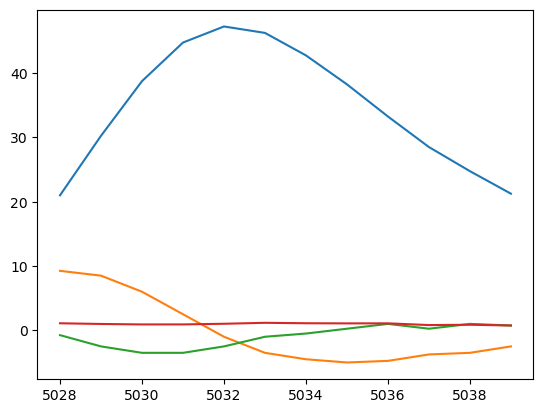

In [30]:
I = [4023,4035]
(x,y) = get_trace_file('Saves/output_smoothed.csv',I)
x = np.array(x[I[0]:I[1]])
y = np.array(y[I[0]:I[1] + 2])
dy = np.array([x - y[i - 1] if i else None for i, x in enumerate(y)][1:])
dy2 = np.array([x - dy[i - 1] if i else None for i, x in enumerate(dy)][1:])
y = y[:-2].transpose()
dy = dy[:-1].transpose()
dy2 = dy2.transpose()
ones = np.ones(y.shape)
plt.plot(x,y)
plt.plot(x,dy)
plt.plot(x,dy2)

import numpy.linalg as la
A = np.array([y,dy,dy2]).transpose()
(sol,res,rank,sv) = la.lstsq(A,ones, rcond = None)
print(sol,res,rank,sv)
plt.plot(x, sol[0]*y + sol[1]*dy + sol[2]*dy2)
print((sol[1] - np.sqrt(np.abs(sol[1]*sol[1] - 4*sol[0]*sol[2])))*0.5/sol[2], (sol[1] + np.sqrt(np.abs(sol[1]*sol[1] - 4*sol[0]*sol[2])))*0.5/sol[2])
